In [1]:
# import requests
import json
import matplotlib.pyplot as plt
import math

In [2]:
# API = 'https://celebration2024.sas.rutgers.edu/data/graduates.json' # no longer has gpa information
LOCAL_JSON = 'gpa.json' # local file to store the data if api is down
MAJOR = -1 # major to filter by (ie. 198 for cs), -1 for all majors

In [ ]:
# req = requests.get(API)

# data = None
# if (req.status_code == 200):
#     data = req.json()
# else:
#     print('Error: Could not retrieve data from the server. Fetching from local file.')

with open(LOCAL_JSON , 'r') as f:
    data = json.load(f)
    
data

In [4]:
def datalyzer(major=-1, precision=1, printer=False):
    freq = {}
    for x in range(0, len(data)):
        if major != -1 and data[x]['MAJ1'] != str(major):
            continue
        gpa = float(data[x]['GPA'])
        less_precise_gpa = math.floor(gpa * 10) / 10
        if less_precise_gpa in freq:
            freq[less_precise_gpa] += 1
        else:
            freq[less_precise_gpa] = 1

    if printer:
        print('GPA Frequency')
        print('-------------')
        for i in range(10, 41, 1):
            key = float(i)/10
            if key in freq:
                if key == 4.0:
                    print(f'{str(key)}\t: {str(freq[key])}')
                else:
                    print(f'{str(key)}-{str(math.floor((key+0.1)*10)/10)} : {str(freq[key])}')

    return freq

freq = datalyzer(major=MAJOR, printer=True)

GPA Frequency
-------------
1.8-1.9 : 6
1.9-2.0 : 8
2.0-2.1 : 24
2.1-2.2 : 36
2.2-2.3 : 50
2.3-2.4 : 64
2.4-2.5 : 66
2.5-2.6 : 114
2.6-2.7 : 150
2.7-2.8 : 171
2.8-2.9 : 178
2.9-3.0 : 236
3.0-3.1 : 295
3.1-3.2 : 308
3.2-3.3 : 308
3.3-3.4 : 363
3.4-3.5 : 406
3.5-3.6 : 442
3.6-3.7 : 453
3.7-3.8 : 409
3.8-3.9 : 454
3.9-4.0 : 410
4.0	: 148


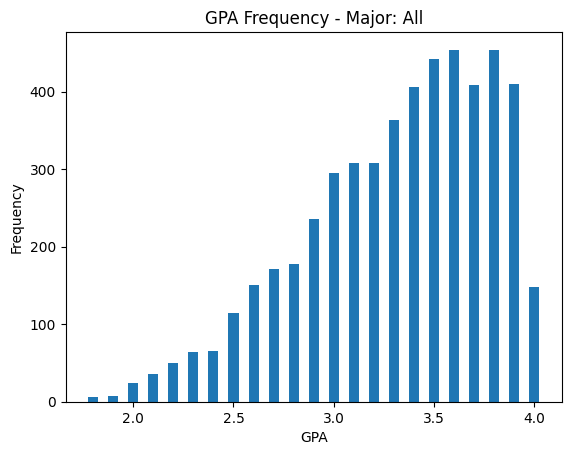

In [5]:
gpa_intervals = list(freq.keys())
gpa_frequencies = list(freq.values())

plt.bar(gpa_intervals, gpa_frequencies, width=0.05)

plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title(f'GPA Frequency - Major: {MAJOR if MAJOR != -1 else "All"}')

plt.show()